Sign Language MNIST data dataset Kaggle Data Source:
https://www.kaggle.com/datamunge/sign-language-mnist

Source Code/Inspiration: PacktPublishing ©  2019 , Trilogy Education Services © 2019

Image Source: https://www.kaggle.com/datamunge/sign-language-mnist


![Image of Sign Language Alphabet](https://raw.githubusercontent.com/diannejardinez/cnn-for-computer-vision/main/CNN-MNIST-Sign-Language/Images/amer_sign2.png "Sign Language Alphabet")

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
train_raw_data = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')

train_raw_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
test_raw_data = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

test_raw_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# Explore Data

In [4]:
# View label column

# Get our training labels
labels = train_raw_data['label'].values

# Get our testing labels
test_labels = test_raw_data['label'].values

# View the unique labels, 24 in total (no 9)
unique_labels = np.array(labels)
np.unique(unique_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Text(0, 0.5, 'Count')

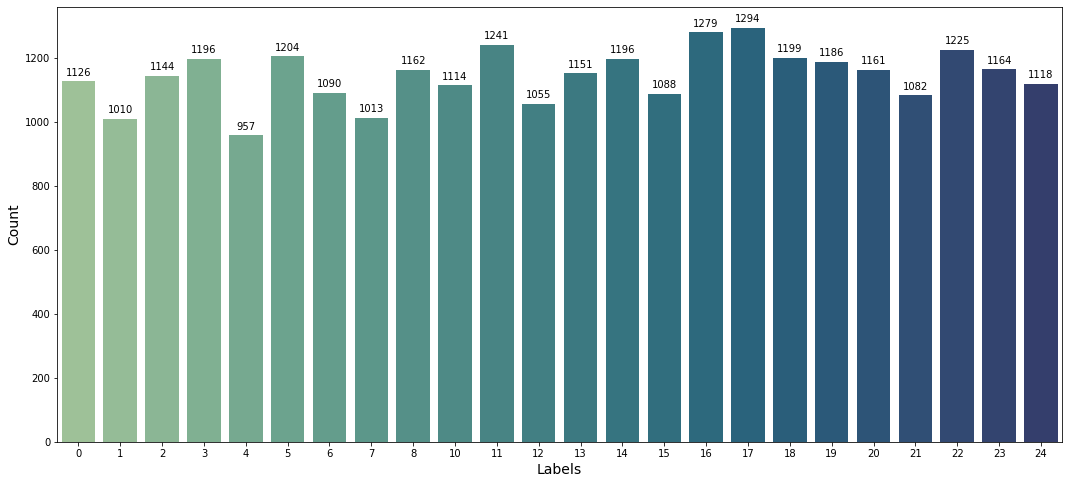

In [5]:
# View how many instances of each label in the training data

# Source code for annotating label count: https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python

# Plot the quantities in each class
plt.figure(figsize = (18,8))
cplot = sns.countplot(x =labels, palette='crest')
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Labels", size=14)
plt.ylabel("Count", size=14)

# Preparing dataset for training

In [6]:
# Drop label column to keep pixel data for training data
train_raw_data.drop('label', axis = 1, inplace = True)

# Drop label column to keep pixel data for testing data
test_raw_data.drop('label', axis = 1, inplace = True)


In [7]:
# Extract the image data from each row 
pxl_img = train_raw_data.values
pxl_img = np.array([np.reshape(i, (28, 28)) for i in pxl_img])
pxl_img = np.array([i.flatten() for i in pxl_img])

test_images = test_raw_data.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [8]:
# One-hot encoding

from keras.utils import to_categorical

one_hot_label = to_categorical(labels)
one_hot_label

test_labels = to_categorical(test_labels)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


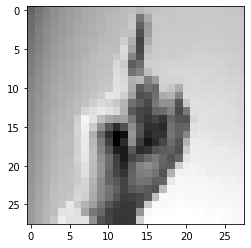

In [9]:
# Inspect an image
index = 0
print(one_hot_label[index])
plt.imshow(pxl_img[index].reshape(28,28), cmap='gray')

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


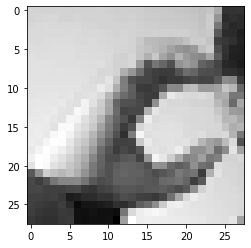

In [10]:
# Inspect an image
index = 3
print(one_hot_label[index])
plt.imshow(pxl_img[index].reshape(28,28),cmap='gray')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0.]


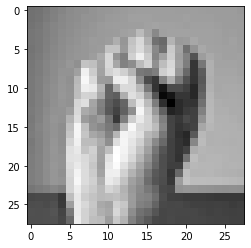

In [11]:
# Inspect an image
index = 10
print(one_hot_label[index])
plt.imshow(pxl_img[index].reshape(28,28),cmap='gray')

In [12]:
# Split data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pxl_img, one_hot_label, test_size = 0.3, random_state = 101)


In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (19218, 784)
19218 train samples
8237 test samples


In [14]:
# Scale images
from sklearn.preprocessing import MinMaxScaler

scale_normalize = MinMaxScaler().fit(x_train)

x_train = scale_normalize.transform(x_train)
x_test = scale_normalize.transform(x_test)

print("Training Shape:", x_train.shape)
print("Testing Shape:", x_test.shape)

Training Shape: (19218, 784)
Testing Shape: (8237, 784)


In [15]:
# Reshape images into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (19218, 28, 28, 1)
19218 train samples
8237 test samples


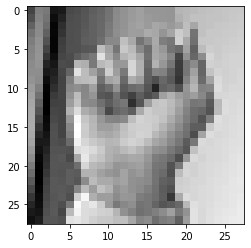

In [16]:
# Show image to check
plt.imshow(x_train[0].reshape(28,28),cmap='gray')

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(7172, 28, 28, 1)


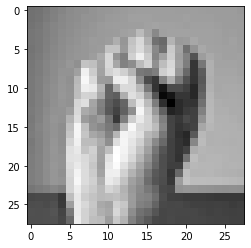

In [17]:
# Reshape images into the size required by TF and Keras - test 

index = 10
print(test_labels[index])
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print(test_images.shape)
plt.imshow(pxl_img[index].reshape(28,28),cmap='gray')

# Create Model

In [18]:
# Create CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

num_classes = 25

model = Sequential()

# Add the first layer
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a second hidden layer
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a third hidden layer
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a fourth hidden layer
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

# Add final output layer
model.add(Dense(num_classes, activation = 'softmax'))

# Compile Model

In [19]:
# Compile Model

model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

# Model Summary

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

# Train Model

In [21]:
batch_size = 128
epochs = 10

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data = (x_test, y_test))

# Accuracy score
score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Epoch 1/10
151/151 [==============================] - 19s 124ms/step - loss: 2.7171 - accuracy: 0.1716 - val_loss: 1.7901 - val_accuracy: 0.4533
Epoch 2/10
151/151 [==============================] - 27s 176ms/step - loss: 1.3683 - accuracy: 0.5411 - val_loss: 0.9148 - val_accuracy: 0.6918
Epoch 3/10
151/151 [==============================] - 28s 188ms/step - loss: 0.8410 - accuracy: 0.7090 - val_loss: 0.5714 - val_accuracy: 0.8172
Epoch 4/10
151/151 [==============================] - 30s 197ms/step - loss: 0.5652 - accuracy: 0.8075 - val_loss: 0.3681 - val_accuracy: 0.8922
Epoch 5/10
151/151 [==============================] - 29s 194ms/step - loss: 0.3915 - accuracy: 0.8682 - val_loss: 0.2588 - val_accuracy: 0.9222
Epoch 6/10
151/151 [==============================] - 28s 186ms/step - loss: 0.2766 - accuracy: 0.9063 - val_loss: 0.2062 - val_accuracy: 0.9342
Epoch 7/10
151/151 [==============================] - 33s 219ms/step - loss: 0.2042 - accuracy: 0.9331 - val_loss: 0.1370 - val_ac

# Plotting Loss and Accuracy Charts

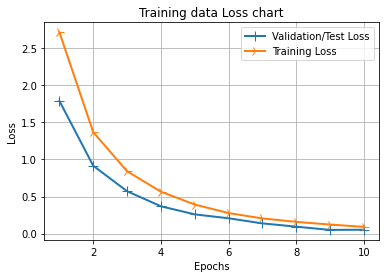

In [22]:
# Plotting loss chart

# Loading model performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.title('Training data Loss chart')
plt.grid(True)
plt.legend()
plt.show()

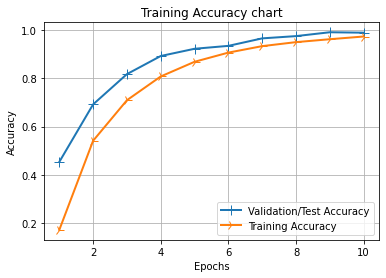

In [23]:
# Plotting accuracy chart

# Loading model performance results
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.title('Training Accuracy chart')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# Getting accuracy score for test data
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_images)

# Accuracy score
score = accuracy_score(test_labels, y_pred.round())
print('Test accuracy:', score)

Test accuracy: 0.7725878416062465


# Save Model

In [25]:
# Save  Model
model.save("sign_mnist_cnn.h5")

In [26]:
# Relabel number to letter

def relabel_to_letter(result):
    letter_labels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return letter_labels[res]
    except:
        return "Error"

# Test Model with Webcam Input

In [27]:
# Source code: https://github.com/PacktPublishing/
# !pip install opencv-python
import cv2

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 

    result = str(model.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, relabel_to_letter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

# Using OpenCV to Build our Dataset

In [28]:
# Model is low accuracy - need to build our own